# Plot available metric names

In [ ]:
import pandas as pd
import numpy as np

metric = pd.read_csv("metrics.csv")
names = set(metric["name"])
print(*names, sep="\n", file=open("metric_names.txt", "w"))
print(f"metric num: {len(names)}")

In [35]:
from collections import OrderedDict

metric_len = []
start_ts = -1
end_ts = -1
information = {}

max_start = 0
min_end = max(metric["timestamp"].tolist())

for m_name in names:
    # seg = metric[(metric["name"] == m_name) & (1590687960 <= metric["timestamp"]) & ( metric["timestamp"] <= 1586554020)]
    seg = metric[(metric["name"] == m_name)]
    seg_len = len(seg)
    if seg_len < 2000:
        continue
    
    start_ts = seg["timestamp"].tolist()[0]
    end_ts = seg["timestamp"].tolist()[-1]

    max_start = max(max_start, start_ts)
    min_end = min(min_end, end_ts)


    metric_len.append(seg_len)
    information[m_name] = {
        "start_ts": start_ts,
        "end_ts": end_ts,
        "len": seg_len
    }

# start & end  
print(max_start, min_end)
information = OrderedDict(sorted(information.items(), key=lambda k: f"{k[1]['start_ts']}{k[1]['len']:0>10d}"))


Metric len: 
 min: 1 max: 3386


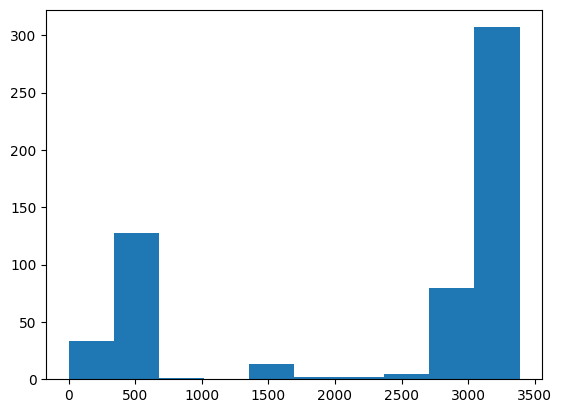

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import os

if not os.path.exists("output"):
    os.mkdir("output")

print(f"Metric len: \n min: {min(metric_len)} max: {max(metric_len)}")

print(json.dumps(information, indent=4), file=open(os.path.join("output", "all_metric.json"), "w"))

plt.figure()
plt.hist(metric_len)
plt.show()


根据all_metric.json的内容，基本可以判断数据点有缺失，且采样密度不一致的： 长的序列300s采样一次， 短的序列60s采样一次，有的序列甚至是采样间隔差距非常大